# Setting up the SIP experiment for follow-up simulations

Samuel Barnett

### Introduction

This is a followup simulation where I take the low GC skewed community and instead of having 50 incorporators each sample with a total of 100 incorporators I have either:

* 25 incorperators/sample and 50 incorporators total
* 100 incorperators/sample and 200 incorporators total

This test will allow me to see if enrichment of 13C labeled genomes varies acording to the number of incorporators. All other files are the same as the original simulations.


## 1) Initialization

First I need to import the python modules I'll use, set some variables, initiate R magic, and create/get into the working directory.

In [1]:
import os
workDir = '/home/sam/data/SIPSim2_data/RealWorld_study3/'
nprocs = 10

In [2]:
import sys
import pandas as pd
import numpy as np
import ConfigParser


In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(dplyr)
library(ggplot2)

/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


In [5]:
# making directories
## working directory
if not os.path.isdir(workDir):
    os.makedirs(workDir)
%cd $workDir


/home/sam/data/SIPSim2_data/RealWorld_study3


In [6]:
sam40 = pd.read_table("low_GC_skew_genomes.txt")
sam40['genome_name'] = sam40[['species', 'accession',]].apply(lambda x: '_'.join(x), axis=1)
sam40.head()

,taxon_name,accession,species,genome_length,GC_percent,num_chromosomes,file_name,genome_name
0,GCF_000325665.1_ASM32566v1_genomic,NC_019908.1,Brachyspira_pilosicoli,2555556,27.917330,1,GCF_000325665.1_ASM32566v1_genomic.fna,Brachyspira_pilosicoli_NC_019908.1
1,GCF_001685395.1_ASM168539v1_genomic,NZ_CP014167.1,Paenibacillus_yonginensis,4985901,51.014430,1,GCF_001685395.1_ASM168539v1_genomic.fna,Paenibacillus_yonginensis_NZ_CP014167.1
2,GCF_001262055.1_ASM126205v1_genomic,NZ_CP012072.1,Actinomyces_meyeri,2049088,65.509973,1,GCF_001262055.1_ASM126205v1_genomic.fna,Actinomyces_meyeri_NZ_CP012072.1
3,GCF_900169485.1_PRJEB19959_genomic,NZ_LT821227.1,Eggerthellaceae_bacterium,1447956,43.440616,1,GCF_900169485.1_PRJEB19959_genomic.fna,Eggerthellaceae_bacterium_NZ_LT821227.1
4,GCF_000953475.1_MfumSolVChr1_genomic,NZ_LM997411.1,Methylacidiphilum_fumariolicum,2476671,41.476603,1,GCF_000953475.1_MfumSolVChr1_genomic.fna,Methylacidiphilum_fumariolicum_NZ_LM997411.1


## 2) Set incorporation parameters

All genomes will be set an incorporation of 90% with standard deviation of 5%. I will run an analysis with 5 different incorporator groups (separate libraries). This is essentially using 5 different carbon substrates, each of which are potentially utilized by a different set of microbes.

Start with the 25 incorporators/sample and 50 total simulation

In [7]:
## Start with the 25 I/S simulation
total_incorp = 50
sample_incorp = 25

genomeset = 'low_GC_skew'

rank_list = np.random.choice(range(1, 501), size=total_incorp, replace=False)

incorp_df = pd.DataFrame(columns=['rank', 'library', 'percent_incorporation', 'sd_incorporation'])
while len(list(set(incorp_df['rank']))) != total_incorp:
    incorp_df = pd.DataFrame(columns=['rank', 'library', 'percent_incorporation', 'sd_incorporation'])
    for lib in [2,3,4,5,6]:
        sub_incorp = pd.DataFrame({'rank' : np.random.choice(rank_list, size=sample_incorp, replace=False),
                                   'library' : lib, 'percent_incorporation' : 90, 'sd_incorporation' : 5})
        incorp_df = incorp_df.append(sub_incorp)
          
comm = pd.read_table(''.join([genomeset, '_comm.txt'])).groupby('taxon_name', as_index=False).agg({'rel_abund_perc': 'mean'})
comm['rank'] = comm['rel_abund_perc'].rank(ascending=1)
if len(list(set(comm['rank']))) != 500:
    print "Error"
incorp_genomes = comm[comm['rank'].isin(rank_list)]
incorp_genomes = incorp_genomes[['rank', 'taxon_name']]
sub_incorp_df = pd.merge(incorp_df, incorp_genomes, on='rank', how='left')
sub_incorp_df = sub_incorp_df[['taxon_name', 'library', 'percent_incorporation', 'sd_incorporation']]
sub_incorp_df.to_csv('_'.join([genomeset, 'I25_incorporators.txt']), sep='\t', header=True, index=False)

Then the 100 incorporators/sample and 200 total simulation

In [8]:
## Start with the 100 I/S simulation
total_incorp = 200
sample_incorp = 100

genomeset = 'low_GC_skew'

rank_list = np.random.choice(range(1, 501), size=total_incorp, replace=False)

incorp_df = pd.DataFrame(columns=['rank', 'library', 'percent_incorporation', 'sd_incorporation'])
while len(list(set(incorp_df['rank']))) != total_incorp:
    incorp_df = pd.DataFrame(columns=['rank', 'library', 'percent_incorporation', 'sd_incorporation'])
    for lib in [2,3,4,5,6]:
        sub_incorp = pd.DataFrame({'rank' : np.random.choice(rank_list, size=sample_incorp, replace=False),
                                   'library' : lib, 'percent_incorporation' : 90, 'sd_incorporation' : 5})
        incorp_df = incorp_df.append(sub_incorp)
          
comm = pd.read_table(''.join([genomeset, '_comm.txt'])).groupby('taxon_name', as_index=False).agg({'rel_abund_perc': 'mean'})
comm['rank'] = comm['rel_abund_perc'].rank(ascending=1)
if len(list(set(comm['rank']))) != 500:
    print "Error"
incorp_genomes = comm[comm['rank'].isin(rank_list)]
incorp_genomes = incorp_genomes[['rank', 'taxon_name']]
sub_incorp_df = pd.merge(incorp_df, incorp_genomes, on='rank', how='left')
sub_incorp_df = sub_incorp_df[['taxon_name', 'library', 'percent_incorporation', 'sd_incorporation']]
sub_incorp_df.to_csv('_'.join([genomeset, 'I100_incorporators.txt']), sep='\t', header=True, index=False)

In [9]:
!head low_GC_skew_I25_incorporators.txt
!wc -l low_GC_skew_I25_incorporators.txt

!head low_GC_skew_I100_incorporators.txt
!wc -l low_GC_skew_I100_incorporators.txt

taxon_name	library	percent_incorporation	sd_incorporation
Spiroplasma_cantharicola_NZ_CP012622.1	2	90	5
Spiroplasma_apis_NC_022998.1	2	90	5
Shewanella_amazonensis_NC_008700.1	2	90	5
Clostridium_botulinum_NZ_CP014176.1	2	90	5
Spiroplasma_syrphidicola_NC_021284.1	2	90	5
Secondary_endosymbiont_NC_018420.1	2	90	5
Gynuella_sunshinyii_NZ_CP007142.1	2	90	5
Mycoplasma_bovoculi_NZ_CP007154.1	2	90	5
Capnocytophaga_haemolytica_NZ_CP014227.1	2	90	5
126 low_GC_skew_I25_incorporators.txt
taxon_name	library	percent_incorporation	sd_incorporation
Lactobacillus_jensenii_NZ_CP018809.1	2	90	5
Mycoplasma_flocculare_NZ_CP007585.1	2	90	5
Lactobacillus_kefiranofaciens_NC_015602.1	2	90	5
Frankia_alni_NC_008278.1	2	90	5
Bacillus_thuringiensis_NC_022873.1	2	90	5
Roseburia_hominis_NC_015977.1	2	90	5
Moorea_producens_NZ_CP017599.1	2	90	5
Mycoplasma_dispar_NZ_CP007229.1	2	90	5
Sulfurospirillum_multivorans_NZ_CP007201.1	2	90	5
501 low_GC_skew_I100_incorporators.txt


Now I'll make sure that one reference set isn't weighted too heavily with high or low G+C incorporators.

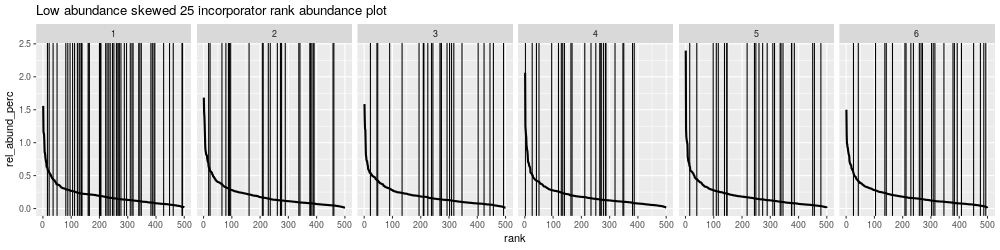

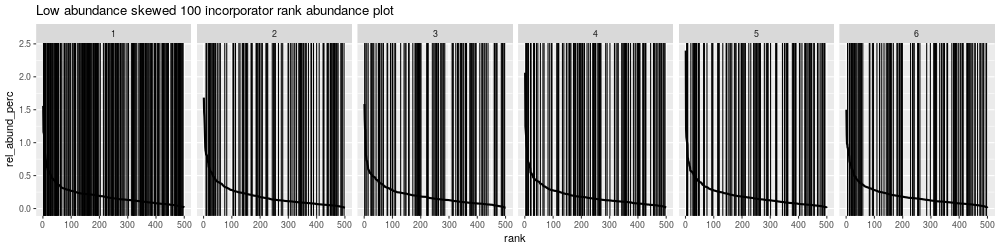

In [11]:
%%R -w 1000 -h 250

I25_incorp.df = read.table("low_GC_skew_I25_incorporators.txt", sep="\t", header=TRUE)
I100_incorp.df = read.table("low_GC_skew_I100_incorporators.txt", sep="\t", header=TRUE)

I25_incorps = unique(I25_incorp.df$taxon_name)
I100_incorps = unique(I100_incorp.df$taxon_name)

I25_comm.df = read.table("low_GC_skew_comm.txt", sep="\t", header=TRUE) %>%
    mutate(incorp = ifelse(library == 1 & taxon_name %in% I25_incorps, "Yes", "No")) %>%
    left_join(I25_incorp.df, by=c("taxon_name", "library")) %>%
    mutate(percent_incorporation = ifelse(is.na(percent_incorporation), 0, percent_incorporation))
I100_comm.df = read.table("low_GC_skew_comm.txt", sep="\t", header=TRUE) %>%
    mutate(incorp = ifelse(library == 1 & taxon_name %in% I100_incorps, "Yes", "No")) %>%
    left_join(I100_incorp.df, by=c("taxon_name", "library")) %>%
    mutate(percent_incorporation = ifelse(is.na(percent_incorporation), 0, percent_incorporation))

I25_comm.plot = ggplot(data=I25_comm.df, aes(x=rank, y=rel_abund_perc)) +
    geom_line(size=1) +
    geom_vline(data=I25_comm.df[I25_comm.df$library == 1 & I25_comm.df$incorp == "Yes",], aes(xintercept = rank)) +
    geom_vline(data=I25_comm.df[I25_comm.df$percent_incorporation != 0,], aes(xintercept = rank)) +
    ggtitle(label = "Low abundance skewed 25 incorporator rank abundance plot") +
    facet_wrap(~library, nrow=1)
I100_comm.plot = ggplot(data=I100_comm.df, aes(x=rank, y=rel_abund_perc)) +
    geom_line(size=1) +
    geom_vline(data=I100_comm.df[I100_comm.df$library == 1 & I100_comm.df$incorp == "Yes",], aes(xintercept = rank)) +
    geom_vline(data=I100_comm.df[I100_comm.df$percent_incorporation != 0,], aes(xintercept = rank)) +
    ggtitle(label = "Low abundance skewed 100 incorporator rank abundance plot") +
    facet_wrap(~library, nrow=1)

print(I25_comm.plot)
print(I100_comm.plot)

